<a href="https://colab.research.google.com/github/rafflds/Censo/blob/main/Base_Censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
<font size=25 color=teal>Ciência de Dados

---
**Fonte (adaptado):** https://www.kaggle.com/laotse/credit-risk-dataset


<font size=5>Esboço

**Exploração dos Dados:**

* Visualização das primeiras linhas do dataset.
* Verificação de tipos de dados.
* Identificação de valores ausentes.
* Estatísticas descritivas.

**Pré-processamento dos Dados:**

* Tratamento de valores ausentes.
* Codificação de variáveis categóricas (se necessário).
* Normalização/Padronização de variáveis numéricas.

**Divisão dos Dados:**

* Separação em conjuntos de treino e teste.
* Treinamento de Modelos de Machine Learning:

**Treinamento de um ou mais modelos**

* Regressão Logística
* Árvores de Decisão
* Random Forest, etc.

**Avaliação dos modelos usando métricas apropriadas**

* acurácia, precisão, recall, F1-score.


**Avaliação e Interpretação dos Resultados:**

* Análise das métricas de desempenho
* Discussão dos resultados.

# Exploração dos dados

## O conjunto de dados contém as seguintes colunas:

* age: Idade do indivíduo.
* workclass: Categoria do tipo de emprego.
* final-weight: Peso final ajustado.
* education: Nível educacional.
* education-num: Número de anos de educação.
* marital-status: Estado civil.
* occupation: Ocupação.
* relationship: Relação familiar.
* race: Raça.
* sex: Sexo.
* capital-gain: Ganho de capital.
* capital-loos: Perda de capital.
* hour-per-week: Horas trabalhadas por semana.
* native-country: País de origem.
*income: Faixa de renda (<=50K ou >50K).

In [1]:
import pandas as pd

# Carregar o arquivo CSV
file_path = '/content/drive/MyDrive/Cientista_de_Dados/Bases de dados/census.csv'
data = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Verificações:

* **Verificar os tipos de dados.**
  * O dataset tem 15 colunas, sendo 6 delas numéricas (int64) e 9 categóricas (object).
* **Identificar valores ausentes.**
  * Não há valores ausentes em nenhuma coluna.
* **Obter estatísticas descritivas.**
  * <font color=red>Numéricas:
    * A idade varia de 17 a 90 anos.
    * O ganho de capital (capital-gain) varia de 0 a 99999, com uma média de 1077.
    * A perda de capital (capital-loos) varia de 0 a 4356, com uma média de 87.
    * As horas trabalhadas por semana (hour-per-week) variam de 1 a 99, com uma média de 40 horas.
  * Categóricas:
    * A maioria das pessoas trabalha no setor privado (workclass: Private).
    * O nível educacional mais comum é HS-grad.
    * O estado civil mais comum é Married-civ-spouse.
    * A maioria das pessoas é da raça White e do sexo masculino (Male).
    * A maioria das pessoas tem uma renda inferior ou igual a 50K (income: <=50K).






In [2]:
# Verificar tipos de dados e valores ausentes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Verificar a existência de valores ausentes
missing_values = data.isnull().sum()
missing_values

,0
age,0
workclass,0
final-weight,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [4]:
# Estatísticas descritivas
descriptive_stats = data.describe(include='all')
descriptive_stats

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Pré-processamento dos Dados:



## Divisão dos Dados
* Vamos dividir o conjunto de dados em conjuntos de treino e teste.

In [5]:
# Separar features e target
X = data.drop('income', axis=1)
y = data['income']

## Codificação das variáveis categóricas.
* Normalização dos dados numéricos, se necessário.


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codificar variáveis categóricas
label_encoders = {}
for column in X:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le


# Normalizar os dados numéricos
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['int64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


# Visualizar as primeiras linhas após o pré-processamento
X.head(3)


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,0.030778,2.150579,-1.294106,-0.335437,1.134739,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.793942,-0.204177,-0.031122,0.291569
1,0.837509,1.463736,-1.251950,-0.335437,1.134739,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.279023,-0.204177,-2.254475,0.291569
2,-0.042561,0.090050,0.593020,0.181332,-0.420060,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.279023,-0.204177,-0.031122,0.291569


## Treinamento de Modelos:
* Treinaremos alguns modelos, como Regressão Logística, Árvore de Decisão, e Random Forest, e avaliaremos seu desempenho.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Treinamento dos Modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Avaliação dos Modelos
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[model_name] = {
        'accuracy': accuracy,
        'report': report
    }



## Resultados (Melhor modelo: Random Forest)

### Classe <=50K (label: <=50K):

* **Precisão**: 89% dos itens classificados como <=50K estavam corretos.
* **Recall**: O modelo identificou corretamente 93% de todos os itens que deveriam ser classificados como <=50K.
* **F1-Score**: Um equilíbrio entre precisão e recall, com um valor de 91%.
* **Support**: Havia 7455 exemplos da classe <=50K.

### Classe >50K (label: >50K):

* **Precisão**: 73% dos itens classificados como >50K estavam corretos.
* **Recall**: O modelo identificou corretamente 62% de todos os itens que deveriam ser classificados como >50K.
* **F1-Score**: Um equilíbrio entre precisão e recall, com um valor de 67%.
* **Support**: Havia 2314 exemplos da classe >50K.
* **Acurácia**: O modelo teve um desempenho geral de **85%.**

### Macro avg:
A média simples das métricas de cada classe, útil para comparar o desempenho em classes desbalanceadas.

### Weighted avg:
Média ponderada das métricas de cada classe, levando em conta o suporte (número de instâncias) de cada classe.

In [13]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report:\n{metrics['report']}")


Model: Logistic Regression
Accuracy: 0.8252635889036749
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7455
        >50K       0.70      0.45      0.55      2314

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769

Model: Decision Tree
Accuracy: 0.8103183539768656
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      7455
        >50K       0.60      0.62      0.61      2314

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.74      9769
weighted avg       0.81      0.81      0.81      9769

Model: Random Forest
Accuracy: 0.8562800696079435
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7455
        >50K

# Salvar base de treino e teste

In [17]:
import pickle

with open('censo.pkl', mode='wb') as f:
  pickle.dump([X_train, X_test, y_train, y_test], f)

# Abrir a base
'''with open('censo.pkl', 'rb') as f:
     X_train, X_test, y_train, y_test = pickle.load(f)'''

"with open('censo.pkl', 'rb') as f:\n     X_train, X_test, y_train, y_test = pickle.load(f)"

# Dashboards

<ipython-input-14-f31536764756>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


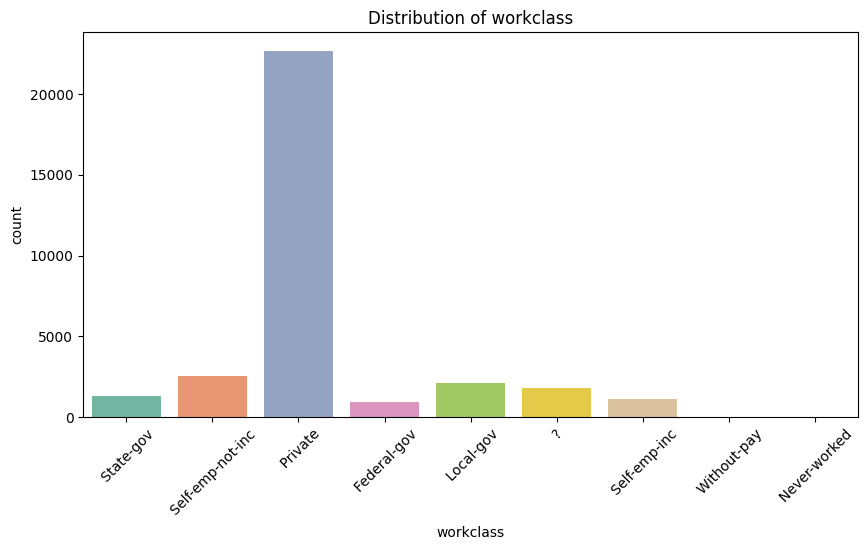

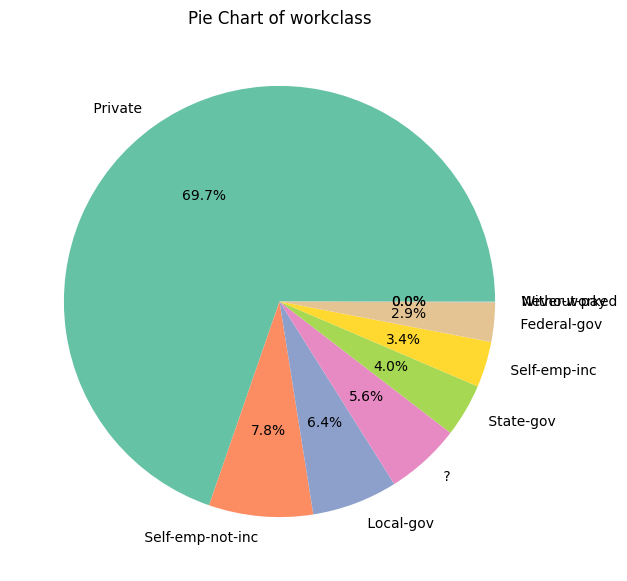

<ipython-input-14-f31536764756>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


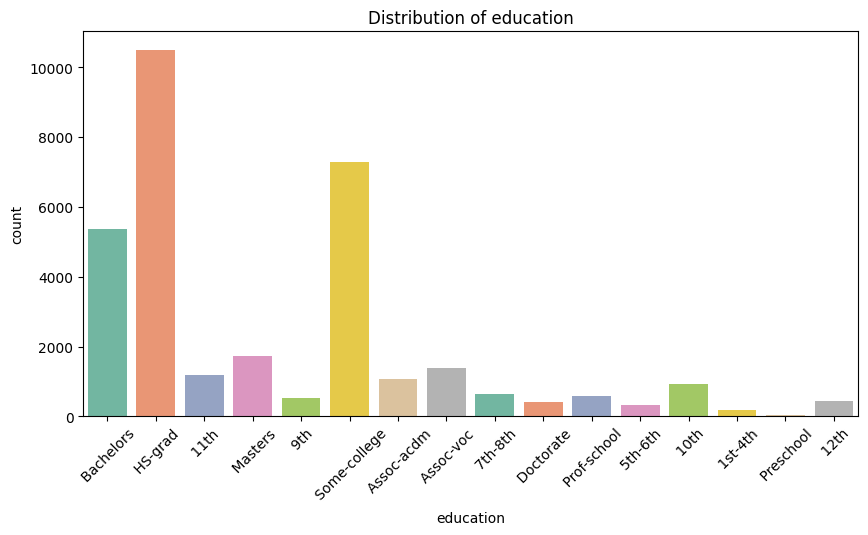

<ipython-input-14-f31536764756>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


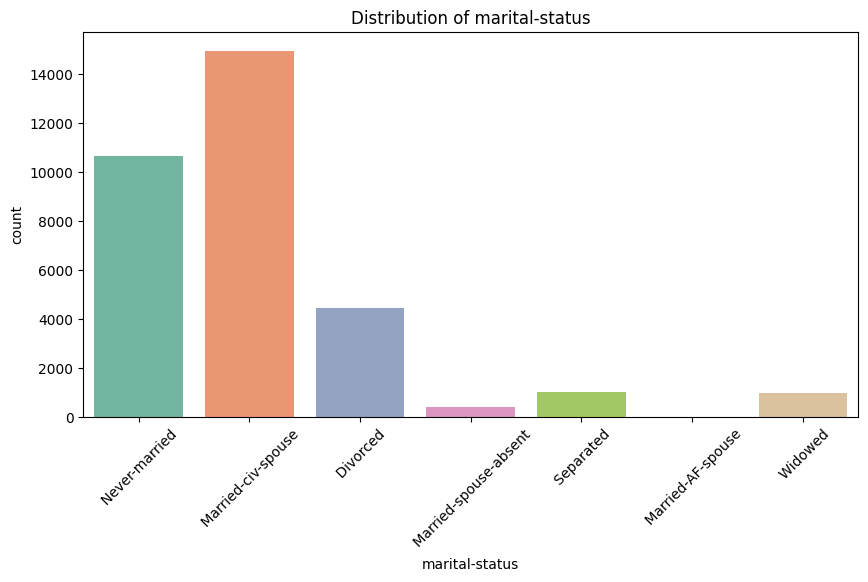

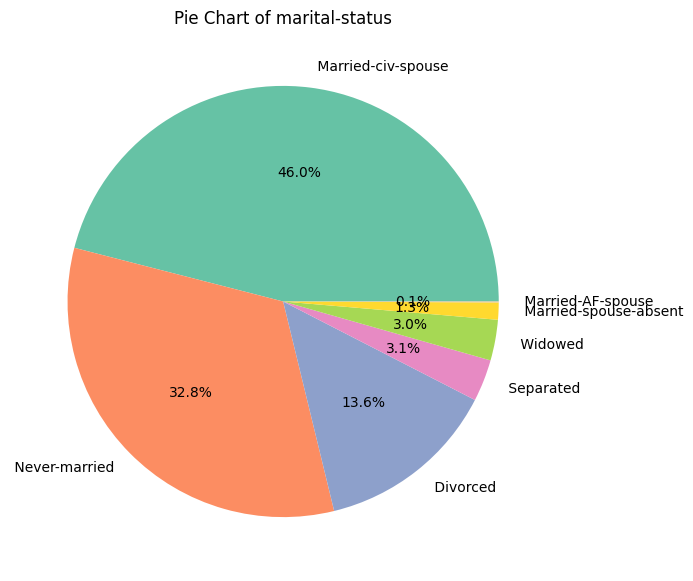

<ipython-input-14-f31536764756>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


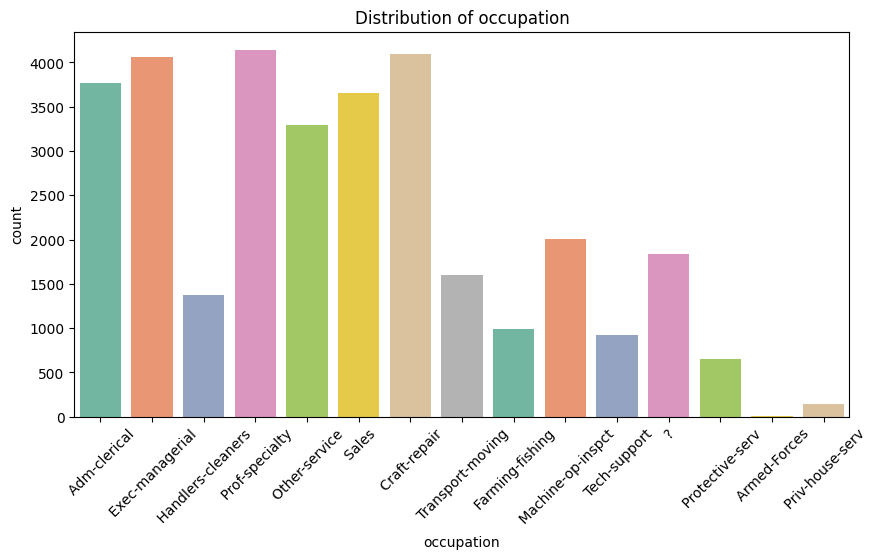

<ipython-input-14-f31536764756>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


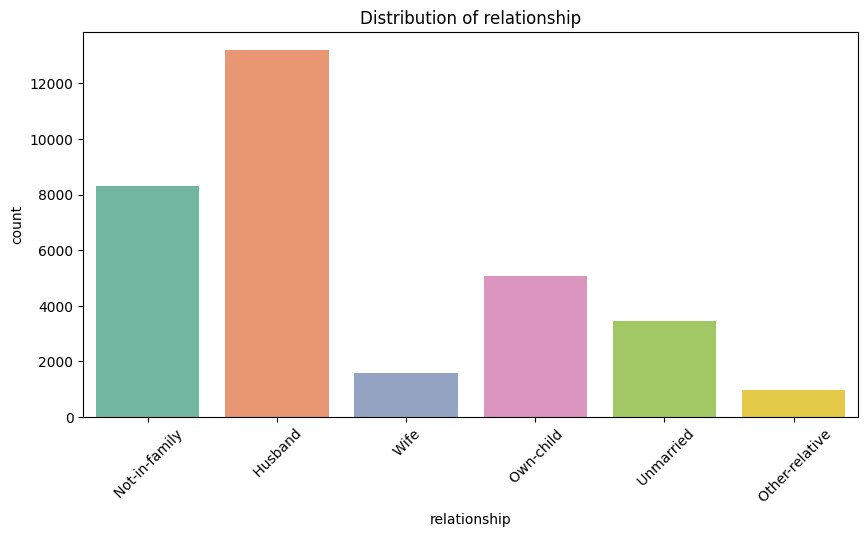

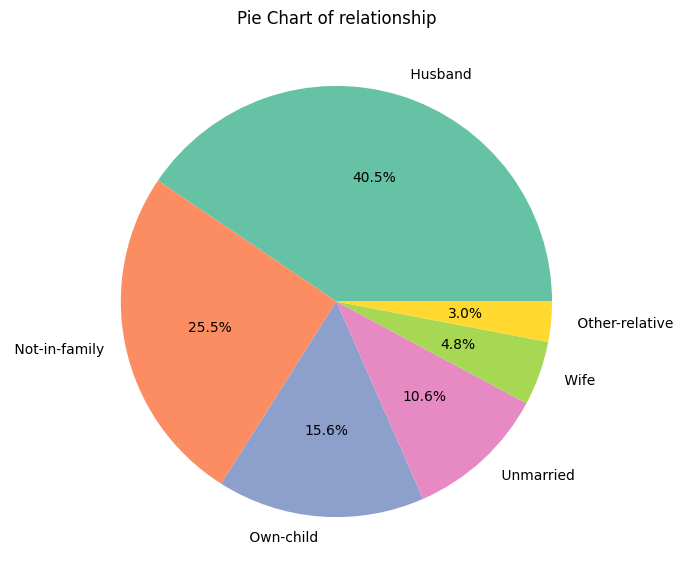

<ipython-input-14-f31536764756>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


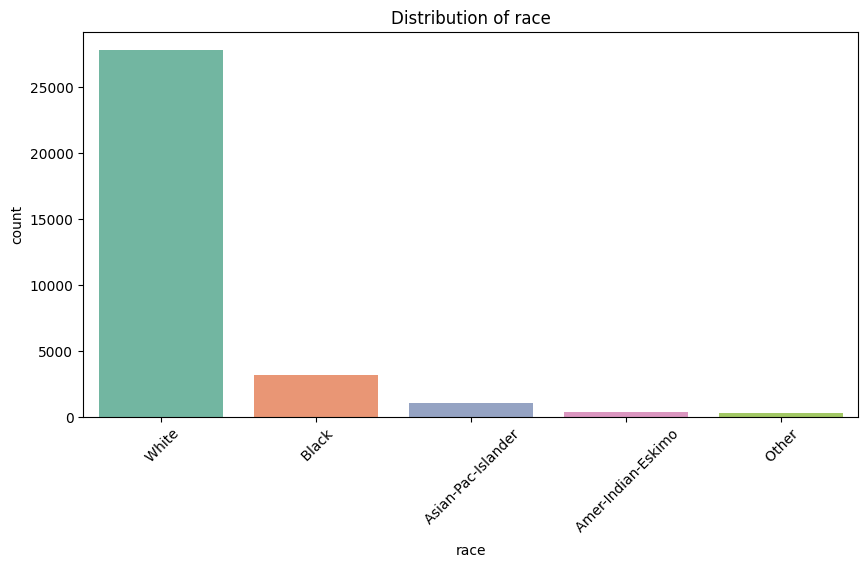

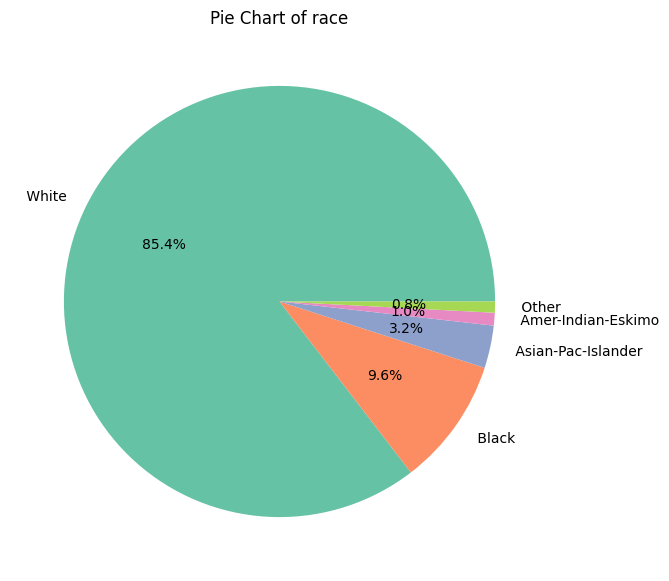

<ipython-input-14-f31536764756>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


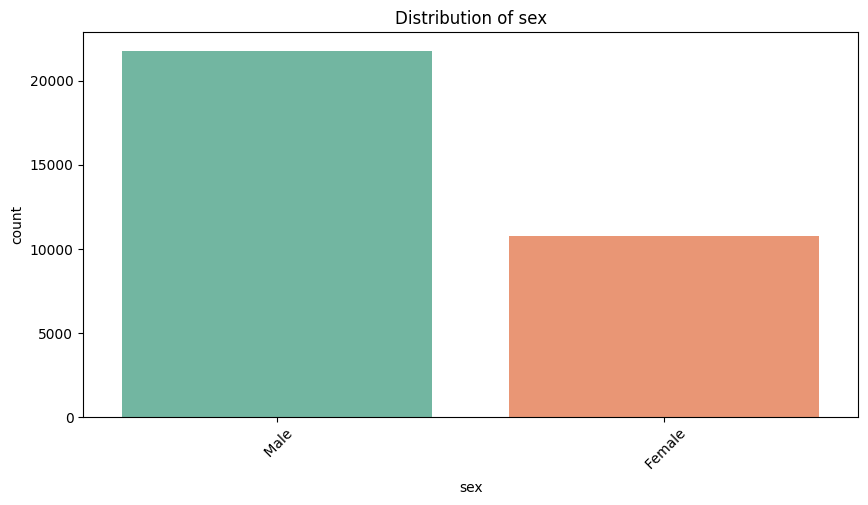

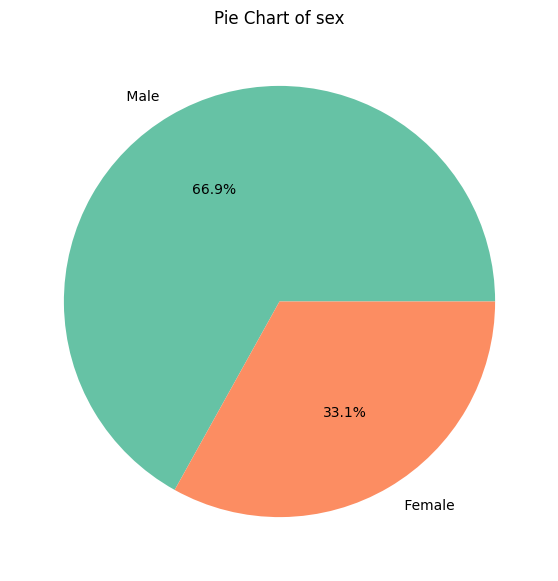

<ipython-input-14-f31536764756>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


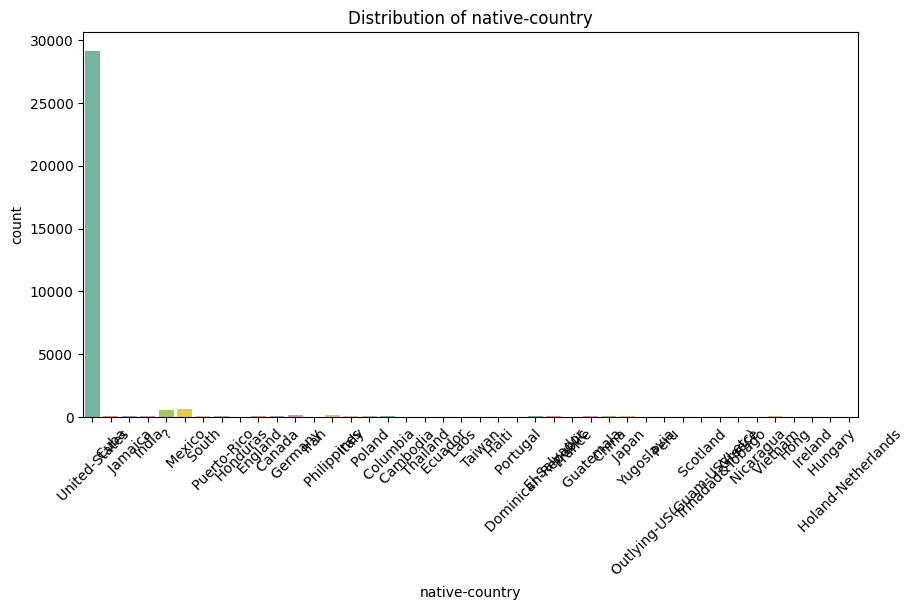

<ipython-input-14-f31536764756>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


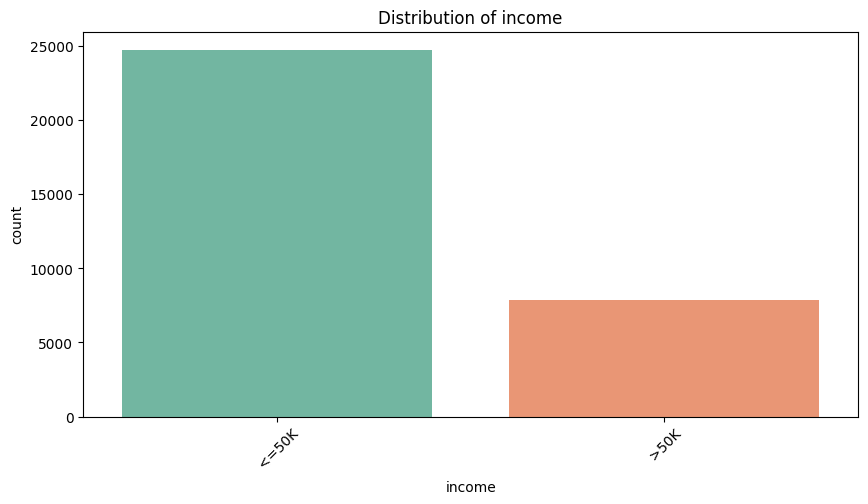

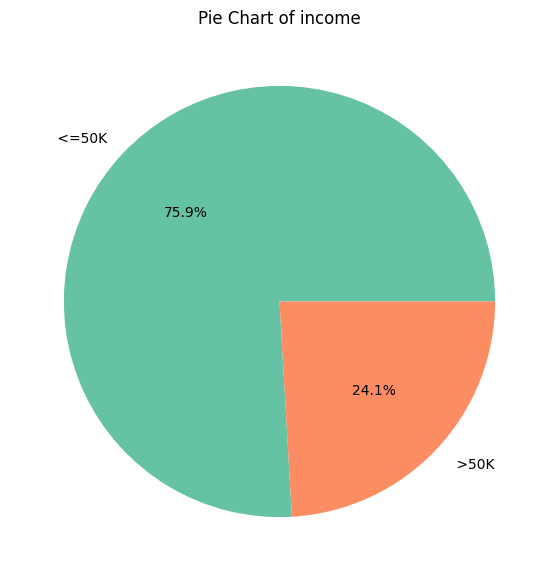

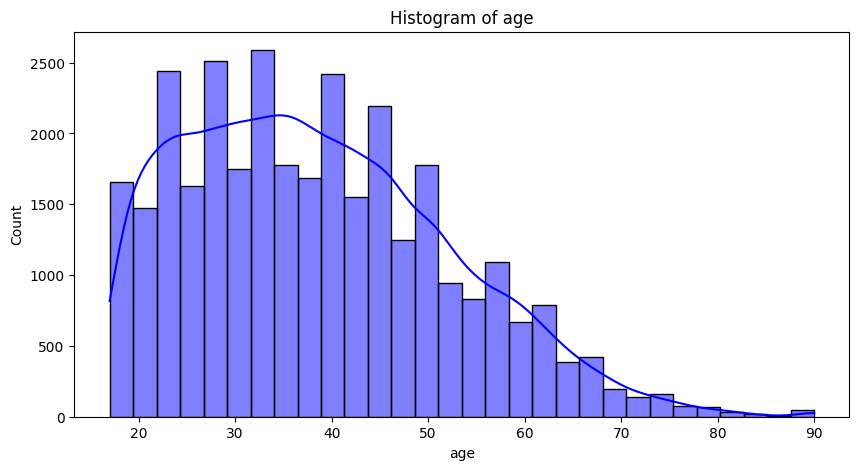

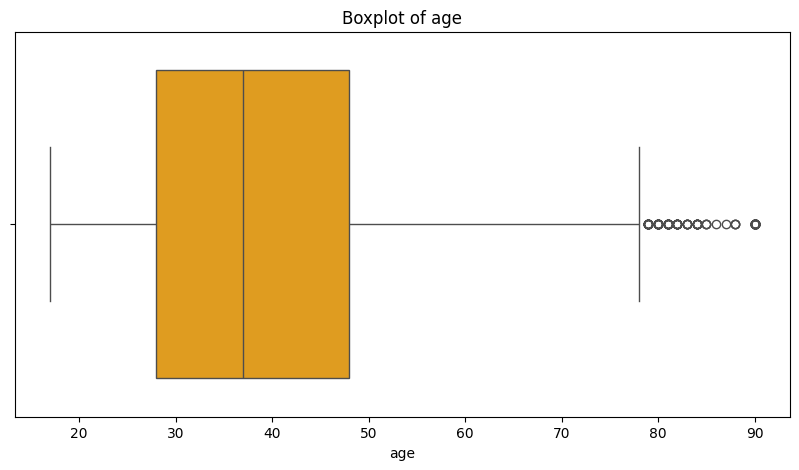

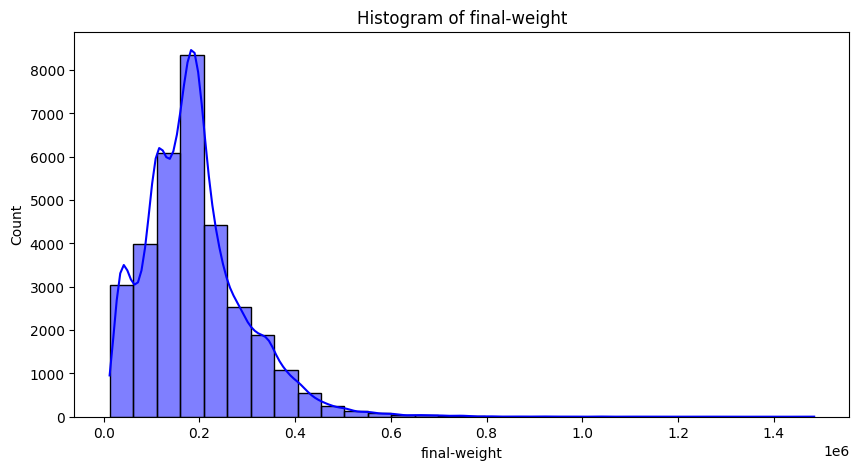

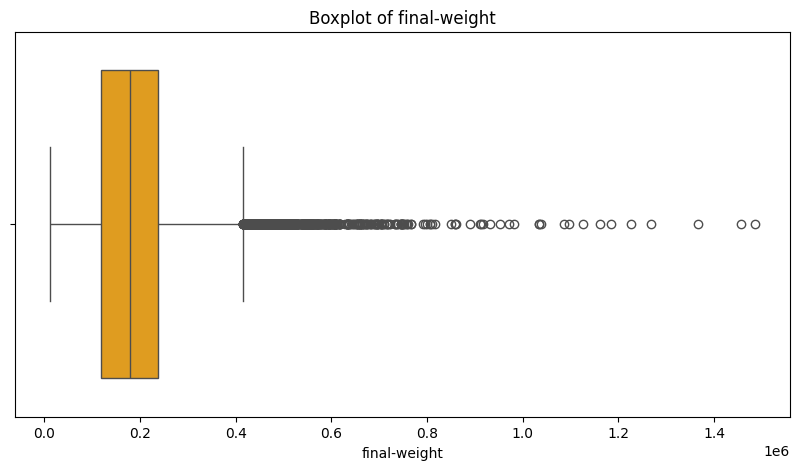

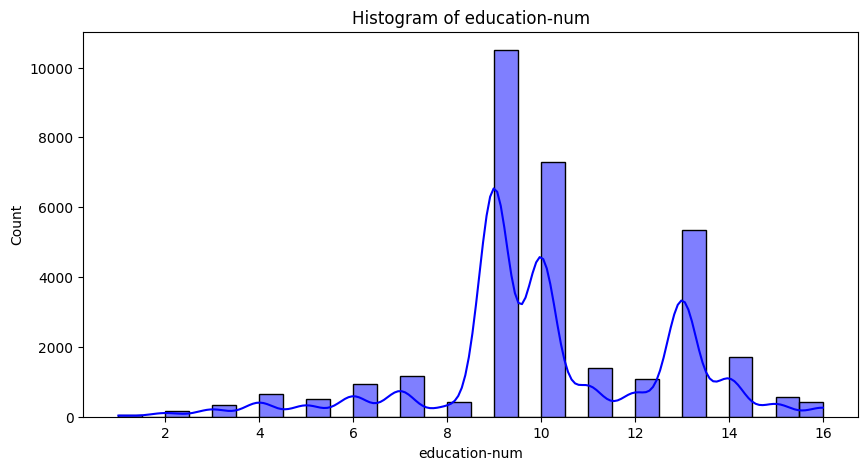

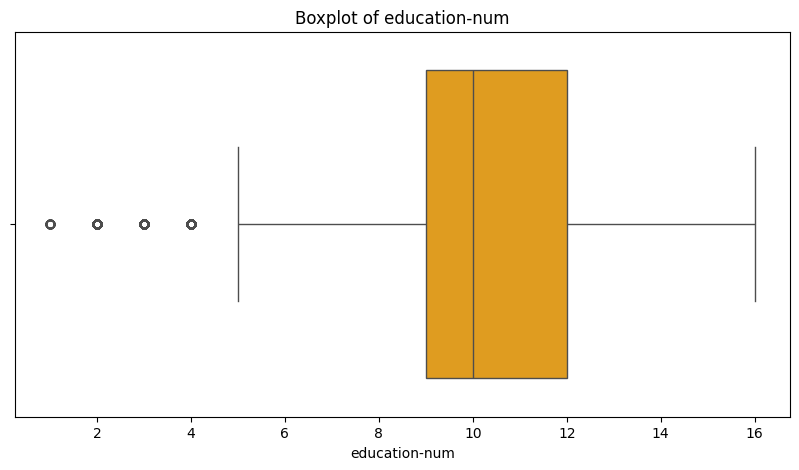

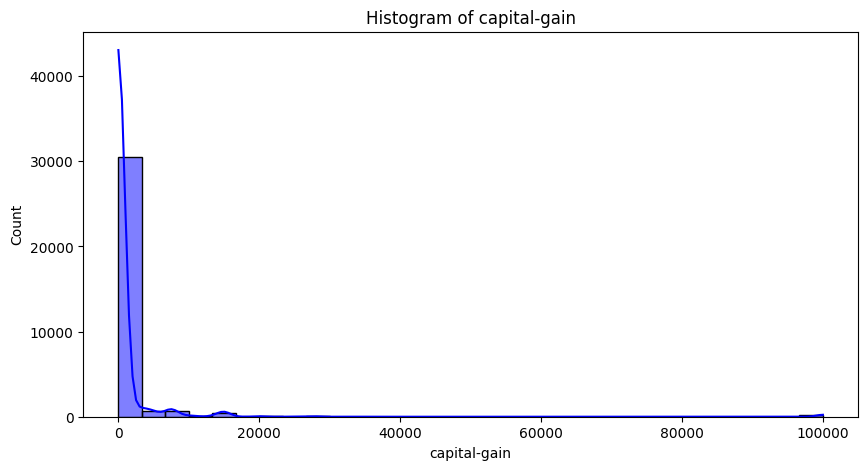

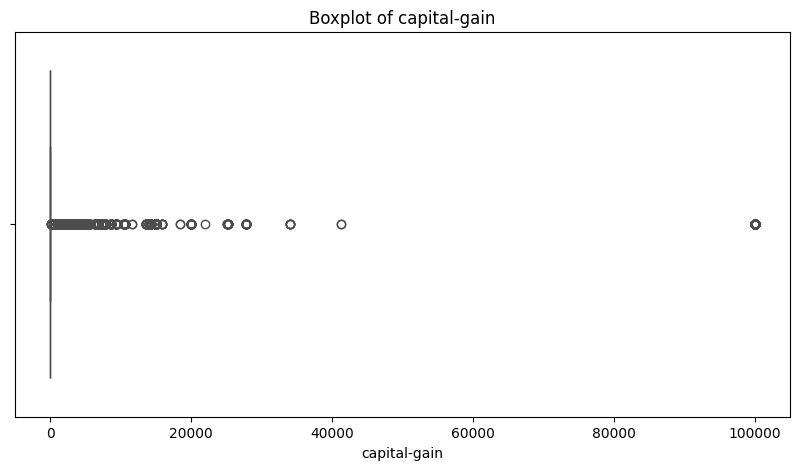

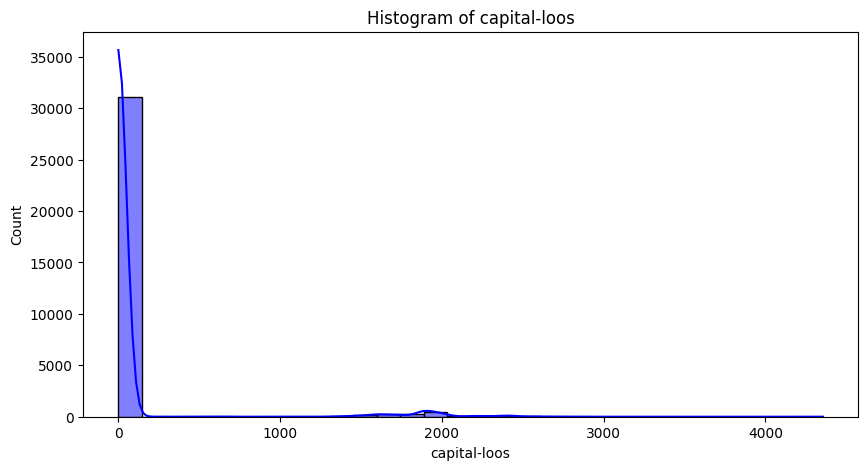

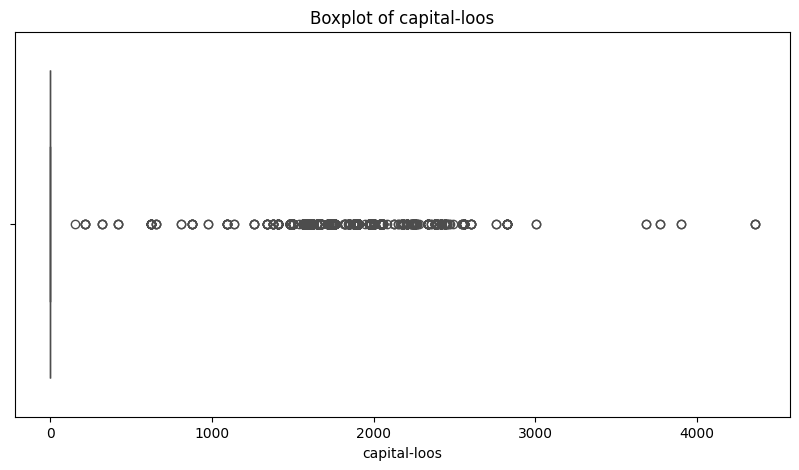

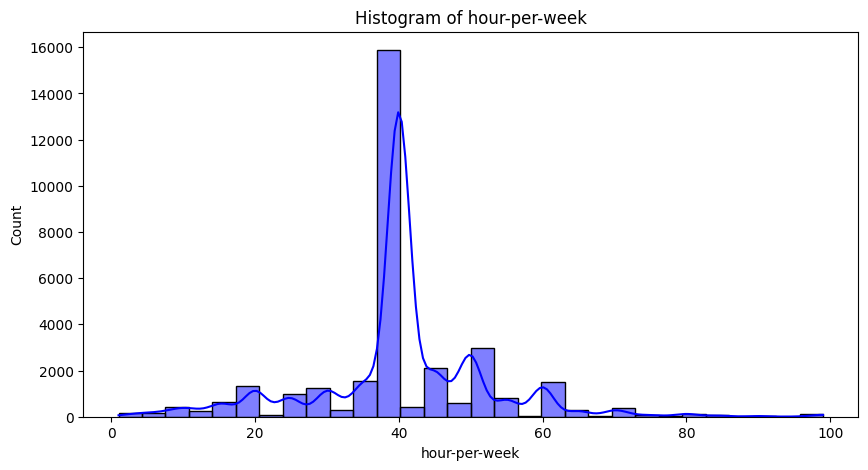

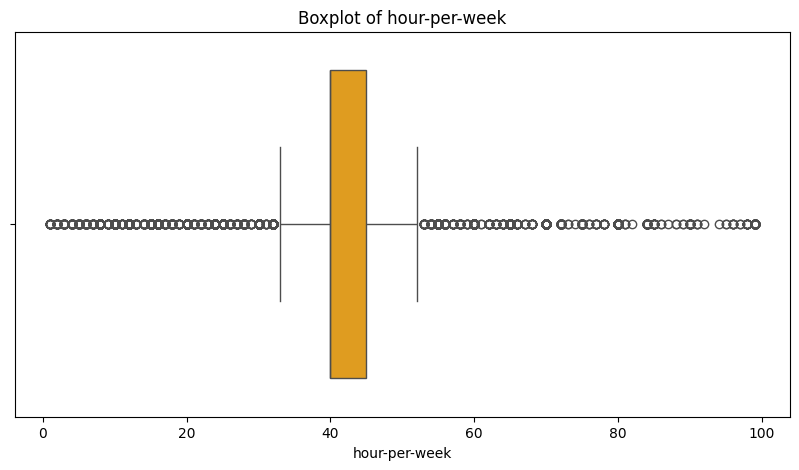

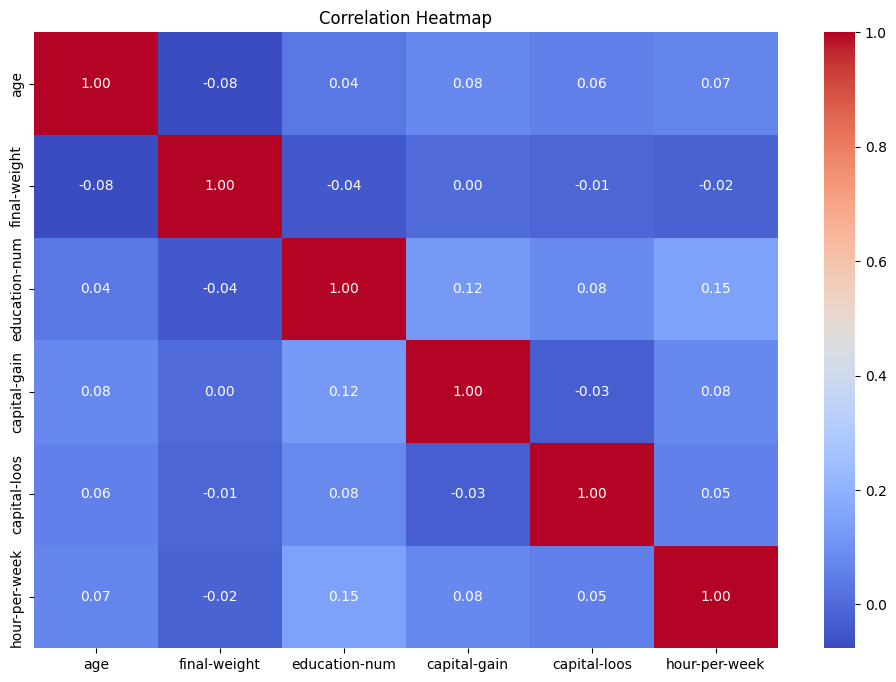

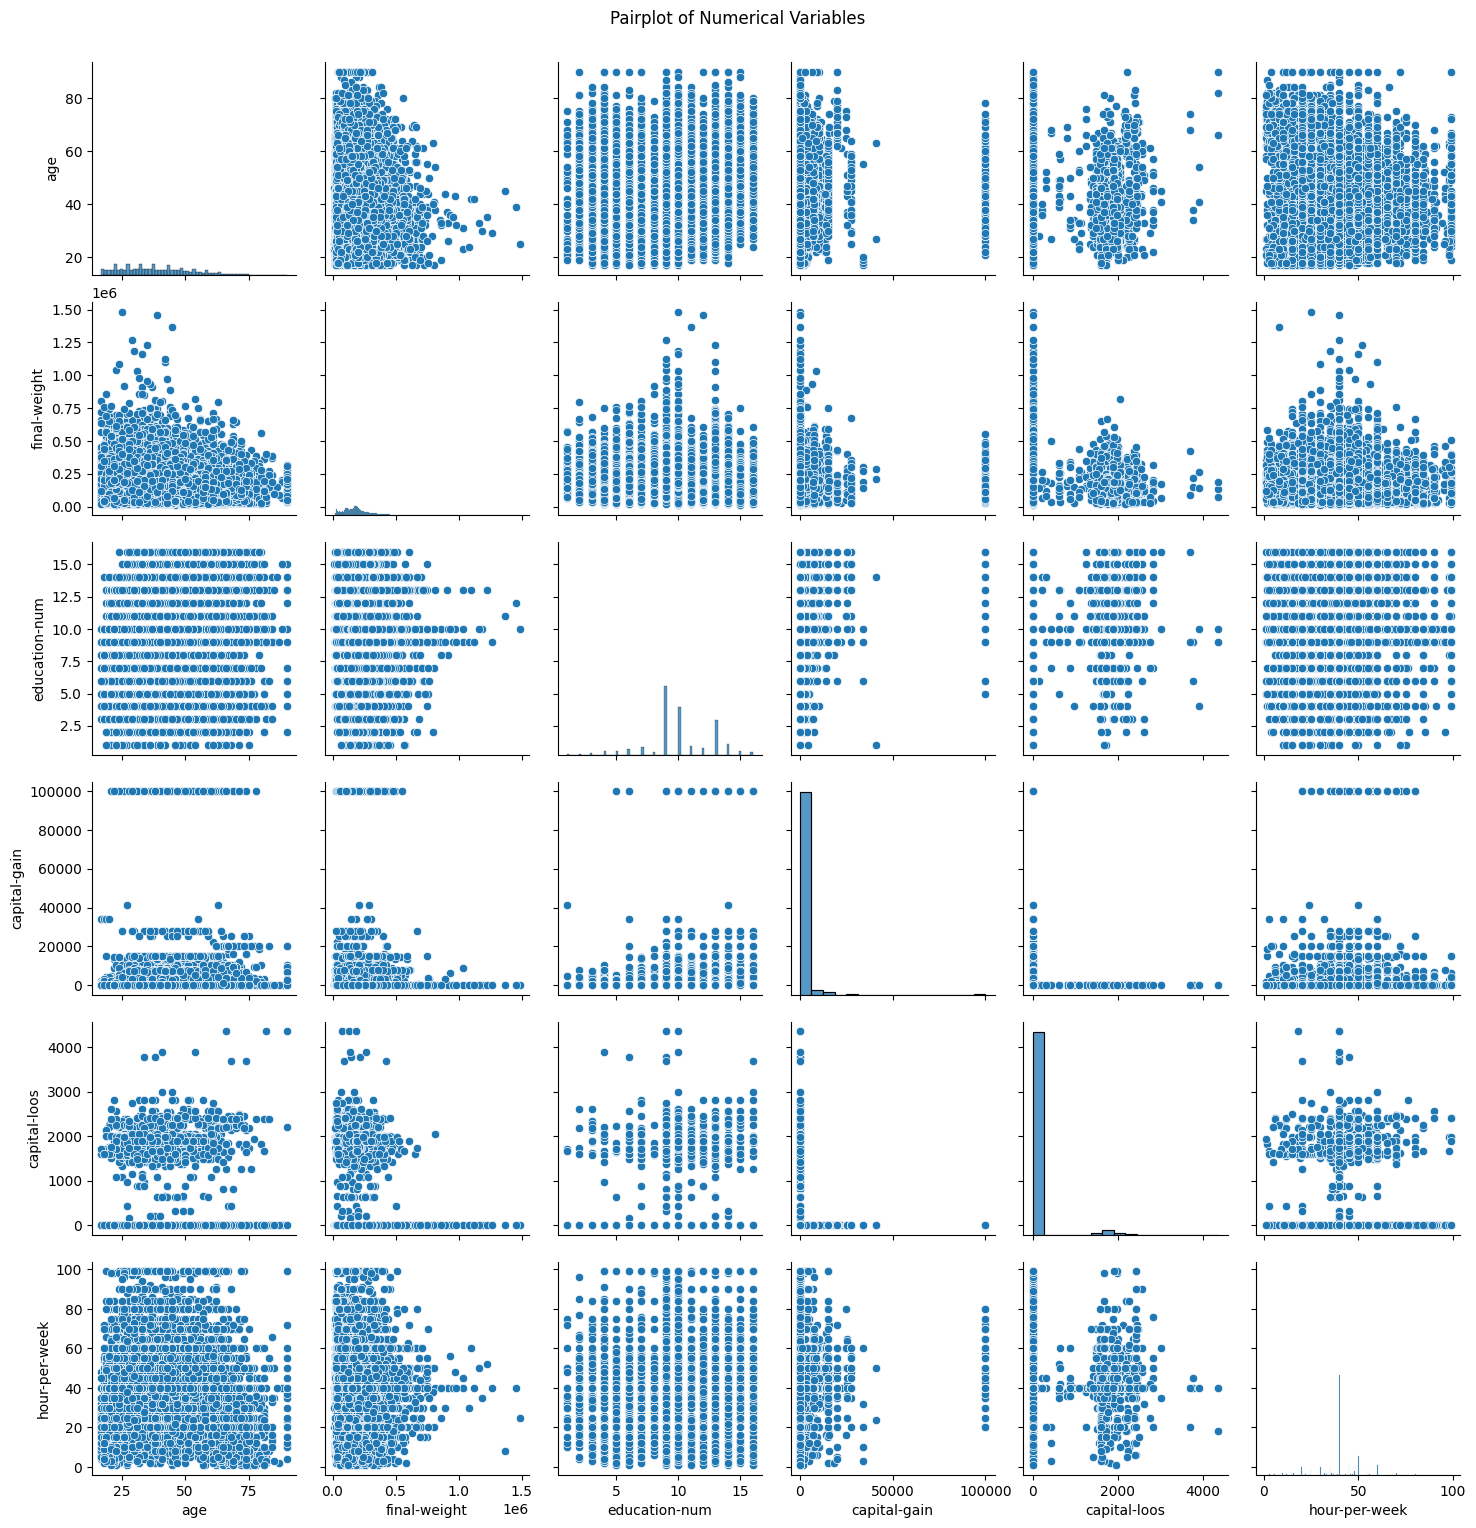

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data_overview(df):
    """
    Gera vários gráficos para a análise exploratória de um DataFrame.

    Parâmetros:
    data (DataFrame): O DataFrame contendo os dados.
    """

    # Identificar colunas categóricas e numéricas
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    # Gráficos para colunas categóricas
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=data, x=col, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

        # Gráfico de pizza para categorias com poucas classes
        if data[col].nunique() < 10:
            plt.figure(figsize=(7, 7))
            data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
            plt.title(f'Pie Chart of {col}')
            plt.ylabel('')  # Remover label desnecessário
            plt.show()

    # Gráficos para colunas numéricas
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))

        # Histograma
        sns.histplot(data[col], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {col}')
        plt.show()

        # Boxplot
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data[col], color='orange')
        plt.title(f'Boxplot of {col}')
        plt.show()

    # Heatmap de correlação para variáveis numéricas
    if len(numerical_columns) > 1:
        plt.figure(figsize=(12, 8))
        sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap')
        plt.show()

    # Pairplot para explorar relações entre variáveis numéricas
    if len(numerical_columns) > 1:
        sns.pairplot(data[numerical_columns])
        plt.suptitle('Pairplot of Numerical Variables', y=1.02)
        plt.show()

# Exemplo de uso:
# df = pd.read_csv('caminho_para_seu_arquivo.csv')
plot_data_overview(data)
